# Introducing Stacasso (Notebook)

v.0.0.1

Stacasso is a Python library for visualizing quantum computing circuits.

The main repository resides on [GitHub](https://github.com/JonHub/stacasso).  The documentation (contained in the repository) can also be viewed online

* [Stacasso README](https://jonhub.github.io/stacasso/)

* **[Introducing Stacasso (Notebook)](https://jonhub.github.io/stacasso/code/stacasso_introduction.html)** (this file) (Introduction and Users's Guide, with Examples)

The Stacasso library is used to pretty-print quantum circuits, as well as visualize the resulting quantum computation.  This notebook demonstrates how to use Stacasso, and visualize a several different quantum computation circuits.

Stacasso is an add-on to the google [Cirq](https://quantumai.google/cirq) quantum computing library.  Cirq is used to create and simulate circuits and for additional back-end code.

For more information on using Cirq, see

* [Introduction to Cirq](https://quantumai.google/cirq/tutorials/educators/intro)

* [Cirq basics](https://quantumai.google/cirq/tutorials/basics)

Stacasso is opensource and free, licensed under Apache 2.0.  Note that Stacasso also uses code from Cirq, used here under the terms of their license (also Apace 2.0).

##### Setup and Imports

In [1]:
# check to see if cirq is installed,
# and install with pip if not

try:
    import cirq
    print("imported cirq (already installed)")
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")

imported cirq (already installed)


In [2]:
# standard set of includes

import matplotlib.pyplot as plt
import time

import numpy as np
%load_ext autoreload
%autoreload 2

np.set_printoptions(precision=6)

%config InlineBackend.figure_formats = ['svg']

#import seaborn
# seaborn.set()


In [4]:
# import the Stacasso functions
import stacasso as so
import hlf
import tele


### Visualizing Amplitudes and Probabilites

Creates a `test_state` out of two qubits.  The state is a superposition, each in a different phase, to demonstrate visual represnting probability amplitudes and phases.

One of the contral notions in quantum computation is the notion that you are not computing with classical *probability*, which is a real number between zero and one.  (Classically, an event can be said to occur with a chance between 0 and 100%.)

In quantum theory, the state of a system is described not be classical *probabilies*, but by complex *amplitudes*.  Amplitudes have a *magitude* between zero (no chance) and one (certainty), but additionally have *phase* information, which is discarded in classical probability, but becomes an important tool in quantum computation.

Moreover, the gates in quantum computing operate on these complex amplitudes, rather than probabilities.  

The classical *probability* is the square of the *amplitude*

Amplitudes are described by a *magnitude* between zero and one Like probabilies, amplitudes can have a *magnitude* between zero (no chance) and one (a certainty).

```python
"Two Qubit State Space (Same Probabilty, Different Phases)"

    
```

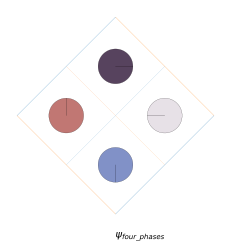

In [5]:
test_state = np.array([1, 1j, -1, -1j])

test_state = so.normalize_state(test_state)

so.draw_statevector4(test_state, location=[4, 2], scale=.4)

plt.text(4, .6, '$\psi_{four\_phases}$')

so.pprint_circuit('', 'Two Qubit State Space (Same Probabilty, Different Phases)')

plt.show()


### Quantum Random Number Generator

A hadamard transformation put the bit into an equal superpositon of two states.

Upon measument, it will collapse to one of two states ("quantum coin flip")

In [6]:
rng_circuit = cirq.Circuit()

q0 = cirq.NamedQubit('qubit 0')

rng_circuit.append(cirq.H(q0))
rng_circuit.append(cirq.measure(q0))


```python
"Quantum Random Number Generator (QRNG)"

    qubit 0: ───H───M───
```

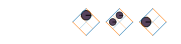

In [7]:
# display rng
# display bell

plt.figure(figsize=[3, 10])
plt.plot(0, 0)  # keeps the plot from shifting

rng_states = so.make_state_list(rng_circuit)

so.pprint_circuit(rng_circuit, 'Quantum Random Number Generator (QRNG)')

# iterate over the steps (states)
for s in range(len(rng_states)):
    state = rng_states[s]
    state = np.append( state, np.zeros(2))
    # draw as a two qubit circuit (second qubit is always zero)
    #np.state.append(np.zeros(2))
    so.draw_statevector4(state, [15+s*7, 0])
    #so.draw_state(state, [s*10,0] )

plt.show()


### Bell State

Bell States are made from maximially entangling two photons.  It is one of the most fundamental quantum mechanical circuits.

In [8]:
# Bell Example, without pretty-print

bell_circuit = so.make_bell_circuit(0, 0)


```python
"Bell State"

    photon A: ───H───@───
                     │
    photon B: ───────X───
```

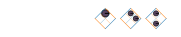

In [9]:
# display bell

plt.figure(figsize=[3, 10])
plt.plot(0, 0)  # keeps the plot from shifting

bell_states = so.make_state_list(bell_circuit)

so.pprint_circuit(bell_circuit, 'Bell State')

# iterate over the steps (states)
for s in range(len(bell_states)):
    state = bell_states[s]
    so.draw_statevector4(state, [25+s*7, 0])
    #so.draw_state(state, [s*10,0] )

plt.show()

# label Psi_0, Psi_Bell, Psi_M

### Quantum Teleportation

[Textbook algorithms in Cirq (Quantum Teleportation)](https://quantumai.google/cirq/tutorials/educators/textbook_algorithms#quantum_teleportation)



In [10]:
# quantum teleportation
import tele

#tele.test()


```python
"Teleportation Circuit"

    A (msg): ───────────X^0.25───@───H───M───────@───
                                 │       │       │
    B (ali): ───H───@────────────X───────M───@───┼───
                    │                        │   │
    M (bob): ───────X────────────────────────X───@───
```

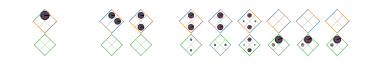

0.30726194381713867


In [11]:
"""Visualize the teleportation circuit."""
# Gate to put the message qubit in some state to send.
gate = cirq.X ** 0.25

# Create the teleportation circuit.
tele_circuit = tele.make_quantum_teleportation_circuit(gate)
#print("Teleportation circuit:\n")
so.pprint_circuit(tele_circuit, 'Teleportation Circuit')

"""Display the Bloch vector of the message qubit."""
message = cirq.Circuit(gate.on(cirq.NamedQubit("Message"))).final_state_vector()
message_bloch_vector = cirq.bloch_vector_from_state_vector(message, index=0)
# print("Bloch vector of message qubit:")
# print(np.round(message_bloch_vector, 3),"\n")

"""Simulate the teleportation circuit and get the final state of Bob's qubit."""
# # Get a simulator.
# sim = cirq.Simulator()

# # Simulate the teleportation circuit.
# result = sim.simulate(circuit)

#states = so.make_state_list(tele_circuit)

# make the state list manually
circuit = tele_circuit
states = []
simulator = cirq.Simulator()
for i, step in enumerate(simulator.simulate_moment_steps(circuit)):
    states.append(step.state_vector())

include_initial_state = True
if include_initial_state:
    initial_state = states[0]*0  # create a blank vector
    initial_state[0] = 1
    states = [initial_state] + states


# # Get the Bloch vector of Bob's qubit.
# bobs_bloch_vector = cirq.bloch_vector_from_state_vector(result.final_state_vector, index=1)
# print("Bloch vector of Bob's qubit:")
# print(np.round(bobs_bloch_vector, 3))

# # Verify they are the same state!
# np.testing.assert_allclose(bobs_bloch_vector, message_bloch_vector, atol=1e-7)

plt.figure(figsize=[len(states)*.715, 100])

start_time = time.time()

# iterate over the steps (states)
# for s in range(len(states)):
#     state = states[s]
#     so.draw_statevector8(state, [5+s*7,0])
#     #so.draw_state(state, [s*10,0] )

so.draw_statevector8(states[0], [5, 0])
so.draw_statevector8(states[1], [21, 0])
so.draw_statevector8(states[2], [28, 0])

so.draw_statevector8(states[3], [40, 0])
so.draw_statevector8(states[4], [47, 0])
so.draw_statevector8(states[5], [54, 0])
so.draw_statevector8(states[6], [61, 0])
so.draw_statevector8(states[7], [68, 0])
so.draw_statevector8(states[8], [75, 0])

plt.plot(0, 0)  # keeps the plot from shifting
plt.show()
elapsed_time = time.time() - start_time
print(elapsed_time)


### HLF 2D

[Hidden linear function problem](https://quantumai.google/cirq/tutorials/hidden_linear_function)

In [12]:
# Create smaller version of the HLF2D problem (3, 4 and 5 qubits)
#   q is number of qubits,
#   l is min_L_size
#
# Every HLD2D problem has zero as an answer (???),
# and can have additional answers
# interesting versions of the problem have only a few answers

# three qubits
q = 3
l = 4

# four qubits
# q = 4
# l = 5

# five qubits
# q = 5
# l = 12

# ten qubits (number from original google code)
#q = 10
#l = 4

print('Creating an HLF 2D problem instance with')
print('  ', q, 'qubits', '\n  ', l, 'min size of L subspace\n')

problem = None
while problem is None:
    print('finding interesting problem ... ', end='')
    problem = hlf.find_interesting_problem(q, l)
    if problem is None:
        print('(not found)')
    else:
        print('done!')

# the original google code uses 10 qbits

print("Size of subspace L:", len(problem.L))
print("Number of solutions: %d" % len(problem.all_zs))

hlf_circuit = hlf.generate_circuit_for_problem(problem)

#so.pprint_circuit( hlf_circuit, 'HLF 2D' )


Creating an HLF 2D problem instance with
   3 qubits 
   4 min size of L subspace

finding interesting problem ... done!
Size of subspace L: 4
Number of solutions: 2


```python
"Hidden Linear Function (HLF 2D)"

    0: ───H───@───S───H───M───
              │
    1: ───H───@───S───H───M───
    
    2: ───H───────────H───M───
```

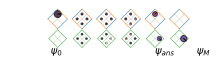

execution time: 0.32


In [13]:
# pretty-print the circuit, and draw the state-space

start_time = time.time()

# simulate the circuit
hlf_states = so.make_state_list(hlf_circuit)

# pretty print
so.pprint_circuit(hlf_circuit, 'Hidden Linear Function (HLF 2D)', indent=4)

# draw the state-space
plt.figure(figsize=[len(hlf_states)*.57, 5])

# iterate over the steps (states)
for s in range(len(hlf_states)):
    state = hlf_states[s]
    so.draw_statevector8(state, [12+s*7, 0])

# fix spacing on these
plt.text(10, -10, '$\psi_0$')
plt.text(40, -10, '$\psi_{ans}$')
plt.text(52, -10, '$\psi_M$')

plt.plot(0, 0)
plt.show()
elapsed_time = time.time() - start_time
print('execution time:', np.round(elapsed_time,  2))


In [14]:
# colorize the circuit, by wrapping in html

circuit_str = str(hlf_circuit).split('\n')

In [15]:
import IPython.display

#text = '[Inline CSS]<span style="font-family: monospace;color: red">This is more dummy text.</span> <span style="font-family: monospace;color: red">This is more dummy text.</span>'
text = '[Inline CSS]<span style="font-family: monospace">This is more dummy text.<span style="color: red">This is more <span style="color: blue">dummy</span> text.</span></span> '

IPython.display.HTML(text)


In [16]:
# index_to_rgb()

In [17]:
#print(cir.split('<br>'))ψ)

In [18]:
indent = 4
# okay, this one is correct

# convert circuit to html
#def circuit_to_html( circuit ):

circuit = hlf_circuit

cir = str(circuit)  # make a string, if it is not already

cir = cir + '\n    ψ      ψ        ψ'
cir = cir + '\n    0      ANS      M'

cir = cir.replace(' ', '&nbsp;')  # replace spaces with html

# color the qubit names
cir_colored_qubits = ''

color_index = 0
for c in cir.split('\n'):
    c = indent*'&nbsp;' + c  # add indent to the start of the lines
    if c.find(':') > 0:
        c_start = c[:c.find(':')+1] # first part (qubit name)
        c_end = c[c.find(':')+1:]  # second part (includes the colon)
        
        c = c_start
        
        # line contains code
        color = None
        cc = '<span style="color:blue">' + c_start + '</span>' + c_end
        cir_colored_qubits += cc
        color_index += 1
    else:
        # line contains no code, just add it back
        cir_colored_qubits += c
        
    cir_colored_qubits += '<br>'
    
cir = cir_colored_qubits

# globa span, for font
#cir = '<span style="font-family:monospace">' + cir + '</span>'
# the preformat tag works the best for displaying circuit code ...
cir = '<pre>' + cir + '</pre>'

cir = cir.replace('@','<span style="color:green">@</span>')
#<span style="color:green">@</span>

display(IPython.display.HTML(cir))



In [19]:
def colorize_html( text, color ):
    """ wraps the text in a new color"""
    pass



In [20]:
#whoa, this changed the _notebook_ font!

# txt = '<html><head><link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Tangerine"> <style>body {font-family: \'Tangerine\', serif; font-size: 48px;}' + '</style></head><body><div>Making the Web Beautiful!</div></body></html>'

#IPython.display.HTML(txt)

In [21]:
# txt = '<link rel="stylesheet"href="https://fonts.googleapis.com/css?family=Font+Name">'

# txt += '<div style="font-family: \'Font Name\', serif;">Your text</div'

# #txt = '<code><span style="color:blue">' + cir + '</span></code>'



In [22]:
#IPython.display.HTML(txt)

In [23]:
cir_long = '<pre><span style="color:blue">&nbsp;&nbsp;&nbsp;&nbsp;0:</span>&nbsp;──────H──────<span style="color:green">@</span>──────S──────H──────M──────<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; │ <br><span style="color:blue">&nbsp;&nbsp;&nbsp;&nbsp;1:</span>&nbsp;──────H──────<span style="color:green">@</span>──────S──────H──────M──────<br>&nbsp;&nbsp;&nbsp;&nbsp;<br><span style="color:blue">&nbsp;&nbsp;&nbsp;&nbsp;2:</span>&nbsp;──────H────────────────────H──────M──────<br></pre>'

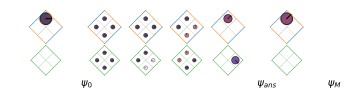

execution time: 0.4


In [24]:
display(IPython.display.HTML(cir_long))

start_time = time.time()

# simulate the circuit
hlf_states = so.make_state_list(hlf_circuit)

# draw the state-space
plt.figure(figsize=[len(hlf_states)*.93, 5])

# iterate over the steps (states)
for s in range(len(hlf_states)):
    state = hlf_states[s]
    
    offset = 7+s*7
    if s == 0:
        offset -=3
    if s == 5:
        offset +=3
    so.draw_statevector8(state, [offset, 0])

    
    
# fix spacing on these
plt.text(10, -10, '$\psi_0$')
plt.text(40, -10, '$\psi_{ans}$')
plt.text(52, -10, '$\psi_M$')

plt.plot(0, 0)
plt.show()
elapsed_time = time.time() - start_time
print('execution time:', np.round(elapsed_time,  2))

In [25]:
txt = '<h2 style="text-align:center;font-family:tahoma">TITLE</h2>'

IPython.display.HTML(txt)
plt.plot
plt.show()

In [26]:
# https://stackoverflow.com/questions/287871/how-to-print-colored-text-to-the-terminal

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    
    RGB = '48;2;⟨r⟩;⟨g⟩;⟨b⟩'
    RGB = '\033[38;2;<r>;<g>;<b>m'    #Select RGB foreground color
    RGB_BG = '\033[48;2;<r>;<g>;<b>m'     #Select RGB background color
    
print(bcolors.WARNING + "Warning: No active frommets remain. Continue?" + bcolors.ENDC)


In [27]:
c = '' + str(hlf_circuit)

# need to actually loop through, and replace these values carefully
#  COLORING THE QBITS IS IMPORTANT ...
c = c.replace('0:', bcolors.WARNING + '0' + bcolors.ENDC + ':')
c = c.replace('1:', bcolors.OKCYAN + '1' + bcolors.ENDC + ':')
c = c.replace('2:', bcolors.WARNING + '2' + bcolors.ENDC + ':')

c = c.replace('@', bcolors.OKGREEN + '@' + bcolors.ENDC)

c = c.replace('M', '\x1b[1;31m' + 'M' + bcolors.ENDC)

#print(bcolors.WARNING + str(hlf_circuit))
print(c)

0: ───H───@───S───H───M───
          │
1: ───H───@───S───H───M───

2: ───H───────────H───M───


In [28]:
print('\x1b[1;31m','hello')

 hello


In [29]:
print('\x1b[2;37;41mWorld')

World


In [30]:
print('\x1b[j','World','\x1b[j')

 World 


In [31]:
print('\x1b[38;5;${50}m hello')

[38;5;${50}m hello


In [32]:
# https://stackoverflow.com/questions/4842424/list-of-ansi-color-escape-sequences
# good reference, not the python escap is
print('\033[31;1;4m' + 'Hello' + '\033[0m');

Hello


In [33]:
# this is RGB?
# this works, for RGB (last 3 values are RGB)
print('\033[38;2;0;80;255m' + 'hello')

hello


In [34]:
# color code the intitial bits,
# do "replace" to change 
# can also do a relpace, by regex (replace numbers, for instance)

In [35]:
# https://stackoverflow.com/questions/287871/how-to-print-colored-text-to-the-terminal

# similar to blender build script
class scolors:
    NUMBER = '\033[95m'
    OPERATOR = '\033[94m'
    STRING = '\033[96m'
    OKGREEN = '\033[92m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    
print(bcolors.WARNING + "Warning: No active frommets remain. Continue?" + bcolors.ENDC)
print(bcolors.WARNING + "       : No active frommets remain. Continue?" + bcolors.ENDC)


       : No active frommets remain. Continue?


In [36]:

import re

K = '*'
# https://docs.python.org/3/howto/regex.html
regex_any_number = '-?(\d*\.)?\d+'

test_str = 'numbers 1 to 90 plus 5 minus -2 and 3.14 or -9.9'

print('original: ' + str(test_str))

# replace x with y in str
res = re.sub(regex_any_number, K, test_str)
          
print('replaced: ' + str(res))

original: numbers 1 to 90 plus 5 minus -2 and 3.14 or -9.9
replaced: numbers * to * plus * minus * and * or *


In [37]:
m = re.match('1','test_str')

In [38]:
p = re.compile('1')
m = p.match(test_str)

In [39]:
print(m)

None


In [52]:
###
#####

so.to_text_diagram( bell_circuit )

'photon A: ─────H─────@─────\n                     │\nphoton B: ───────────X─────'

In [53]:
#p = re.compile(r'\W+')
s = re.split(regex_any_number,'This is a 7 test, short and sweet, of split().')

# ... splits, but does not find the number ...

In [42]:
len(s)

3

In [56]:
# would need to bound an a function to the to_text_diagram() function?
# (this function is probably called by the __str()__ function?)
# https://www.ianlewis.org/en/dynamically-adding-method-classes-or-class-instanc

out = so.to_text_diagram( bell_circuit )

print(out)

photon A: ─────H─────@─────
                     │
photon B: ───────────X─────


In [44]:
from types import MethodType

obj.method = MethodType(new_method, obj, MyObj)
obj.method()

NameError: name 'new_method' is not defined

In [45]:
# unbound method

MyObj.method = MethodType(new_method, None, MyObj)
print(MyObj.method)
#<unbound method MyObj.new_method>
bj2 = MyObj(2)
obj2.method(5)

NameError: name 'new_method' is not defined

In [46]:
class MyObj(object):
    def __init__(self, val):
        self.val = val

def new_method(self, value):
    return self.val + value

obj = MyObj(3)
obj.method = new_method


# "every function is a descriptor"
obj.method = new_method.__get__(MyObj, obj)

In [ ]:
# https://www.geeksforgeeks.org/python-splitting-text-and-number-in-string/
#  ... on splitting the RexEX ... but use the to string instead, probably ...